In [2]:
import json
import pandas as pd
pd.set_option('display.max_rows', 500)

In [3]:
def count_words(word):
    word_list = word.split()
    return len(word_list)

def count_characters(word):
    return len(word)

In [5]:
search_engines = [
    { 'name': 'google', 'category': 'web' },
    { 'name': 'neeva', 'category': 'web' },
    { 'name': 'bing', 'category': 'web' },
    { 'name': 'duckduckgo', 'category': 'web' },
    { 'name': 'yahoo', 'category': 'web' },
    { 'name': 'amazon', 'category': 'ecom' },
    { 'name': 'ebay', 'category': 'ecom' },
    { 'name': 'etsy', 'category': 'ecom' },
    { 'name': 'target', 'category': 'ecom' }
]

fmt_results = [];

for row in search_engines:
    results_path = './../cypress/fixtures/' + row['name'] + "-output.json"
    f = open(results_path, "r")
    results = json.load(f)
    
    for query in results:
        for suggestion in query['results']:                    
            fmt_suggestion = {
                'search_engine': row['name'],
                'category': row['category'],
                'query': query['query'],
                'text': suggestion['text'],
                'index': suggestion['index'],
                'height': suggestion['height'],
                'num_suggestions': len(query['results']),
                'num_words': count_words(suggestion['text']),
                'num_characters': count_characters(suggestion['text']),
            }
            fmt_results.append(fmt_suggestion);
            

df = pd.DataFrame(fmt_results)            

In [6]:
df.groupby(['search_engine'])['num_suggestions'].describe()

,count,mean,std,min,25%,50%,75%,max
search_engine,,,,,,,,
amazon,165.0,11.351515,2.411371,10.0,10.0,11.0,11.0,18.0
bing,148.0,9.878378,0.327958,9.0,10.0,10.0,10.0,10.0
duckduckgo,120.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
ebay,164.0,11.500000,1.279858,2.0,11.0,12.0,12.0,13.0
etsy,155.0,10.664516,1.275531,4.0,11.0,11.0,11.0,11.0
google,150.0,10.000000,0.000000,10.0,10.0,10.0,10.0,10.0
neeva,75.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
target,125.0,9.672000,1.615330,1.0,10.0,10.0,10.0,10.0
yahoo,148.0,9.878378,0.327958,9.0,10.0,10.0,10.0,10.0


---
# How many suggestions should be shown?
Looking across all of the searches what is the average number of suggestions that each search engine shows in there autocompletes?

In [57]:
avg_num_suggestions = df.groupby(['search_engine'])['num_suggestions'].agg(['mean']).sort_values('mean')

<AxesSubplot:title={'center':'Number of suggestions shown'}, xlabel='search_engine'>

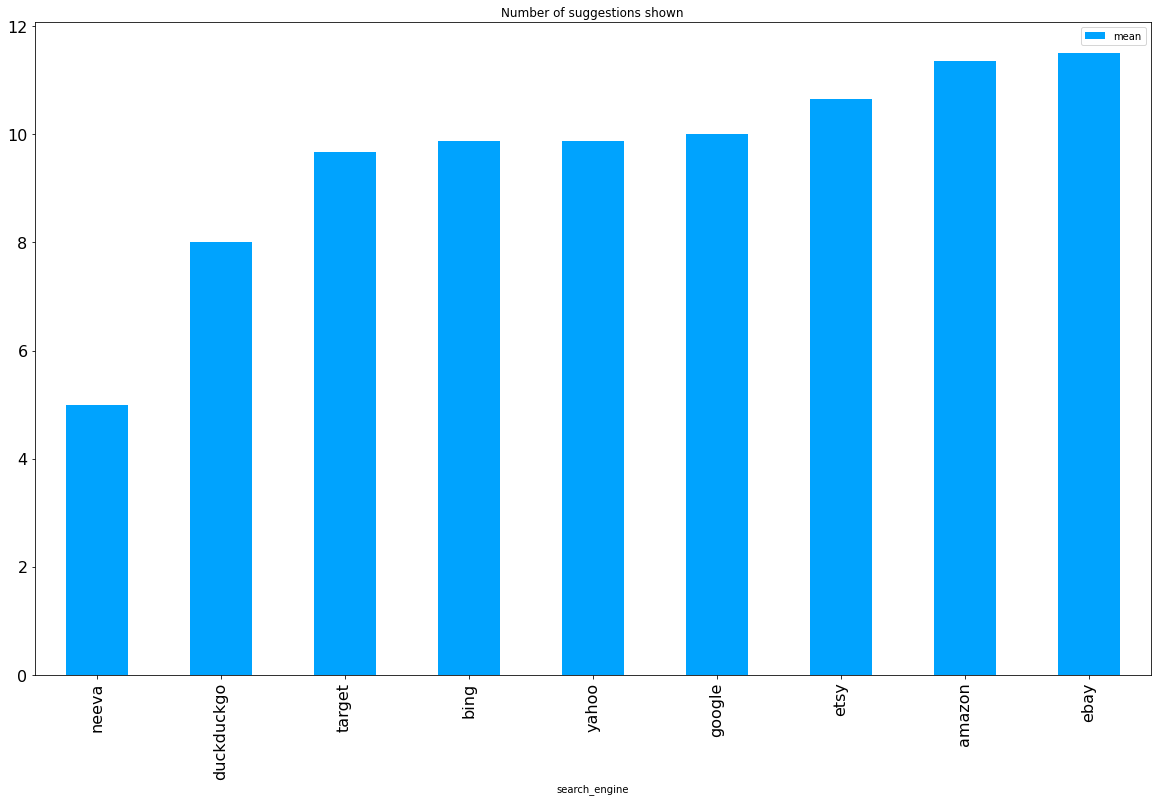

In [62]:
avg_num_suggestions.plot(kind='bar', title='Number of suggestions shown', y='mean', figsize=(20,12), fontsize=16, color=['#00a3fe'])